Hello, dear reader! This is the second notebook in the Spring 2019 MCFAM math of machine learning seminar at the University of Minnesota. Join us in person in Vincent Hall 301, 1:30-2:30 pm, in February 2019.

This notebook extends discussion of decision trees. We will concentrate on the DecisionTreeClassifier in scikit-learn. What's a decision tree? What are information gain and Gini impurity?

In particular, this notebook will also start a more in-depth discussion of overfitting and parameter tuning. Decision trees are a great place to start because they're relatively easily interpretable, unlike neural networks or even support vector machines, and so we can look more deeply at how overfitting can happen.

Decision trees can be used for classification or regression. We'll start with decision trees for classification -- evaluating the results of a classification model is very easy, while evaluating results of a regression model is marginally more mathematically intensive.

This worksheet is copyleft by Kaisa Taipale, 2019, under the GNU Affero GPL.

In [1]:
# Here I'll show my version of Python and compiler for troubleshooting purposes

import sys
print(sys.version)
print(sys.version_info)
    

3.6.4 |Anaconda, Inc.| (default, Mar 12 2018, 20:05:31) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


## Load packages and data files

At the top here and in all future notebooks, I'll just have a big cell collecting all the libraries that I want to use in the notebook, as well as code to make images display inline. I'll also load the csv files for the mystery data we'll play with.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [3]:
# We'll use the mystery data from last time, which you should have already created decision trees for.

mystery1 = pd.read_csv("mysteryclassification1.csv") # three labels
mystery2 = pd.read_csv("mysteryclassification2.csv") # two labels
mystery3 = pd.read_csv("mysteryclassification3.csv") # two labels

In [4]:
# We'll also use some special mystery data I made just for this session!

## Mystery3, first

First, let's look at the mystery3 data. Did you do this last week? :)

I want to look at mysteryclassification3.csv right away because when I fit a decision tree to this data, I generally get an accuracy score in the low eighty-percent range, rather than above ninety percent. We can compare this to mystery2, which gave us such high accuracy.

In [82]:
# Let's put mystery3 into this X, y format
# Let's put mystery3 into this X, y format
X2 = mystery2[['x','y']]
y2 = mystery2[['label']]

X3 = mystery3[['x','y']]
y3 = mystery3[['label']]

In [83]:
# Make a train-test split using scikit-learn's train_test_split
# This leaves 20% of the data as a test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=13249)


X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=13249)

In [84]:
# create a model called clf using the DecisionTreeClassifier method
clf2 = tree.DecisionTreeClassifier()
# fit the model clf using the training data
clf2 = clf2.fit(X2_train, y2_train)

# create a model called clf using the DecisionTreeClassifier method
clf3 = tree.DecisionTreeClassifier()
# fit the model clf using the training data
clf3 = clf3.fit(X3_train, y3_train)

In [85]:
# predict the labels for y_test given the features of X_test
y2_pred = clf2.predict(X2_test)
y3_pred = clf3.predict(X3_test)

In [86]:
metrics.accuracy_score(y2_test, y2_pred, normalize=True, sample_weight=None)

0.99375

In [87]:
metrics.accuracy_score(y3_test, y3_pred, normalize=True, sample_weight=None)

0.88

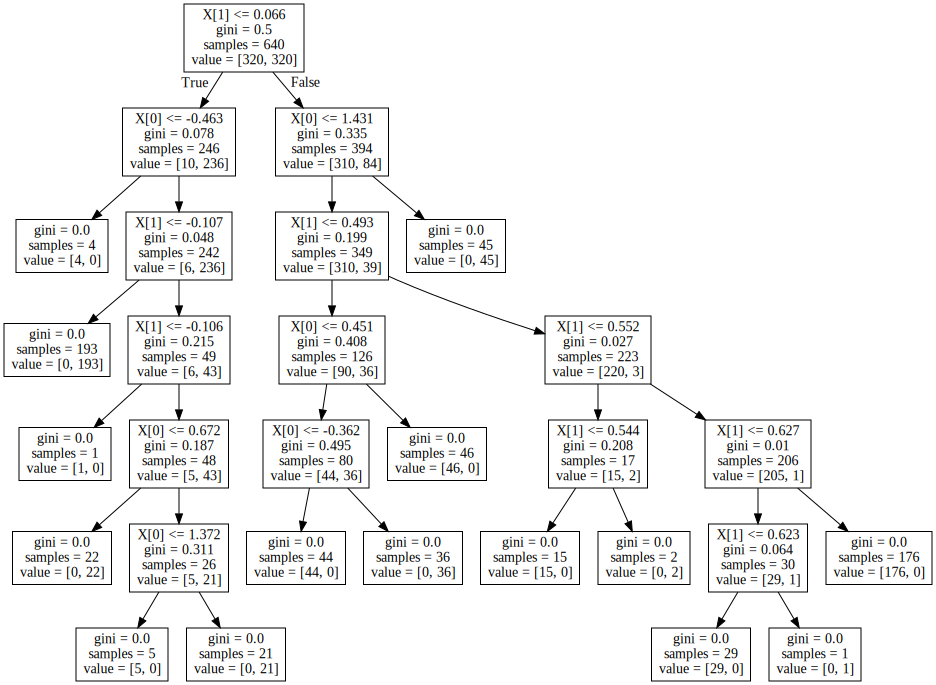

In [88]:
# If you are able to install graphviz, you can visualize the decision tree that you created.
# This is a fun exercise because you can see quickly how ridiculously complex this one is.
# I've been unable to install in Windows,
# and on a Mac with Anaconda, it's important to note that 'conda install graphviz' WON'T HELP
# you must use instead 'conda install python-graphviz'

import graphviz 
dot_data2 = tree.export_graphviz(clf2, out_file=None)
graph2 = graphviz.Source(dot_data2)  
graph2 


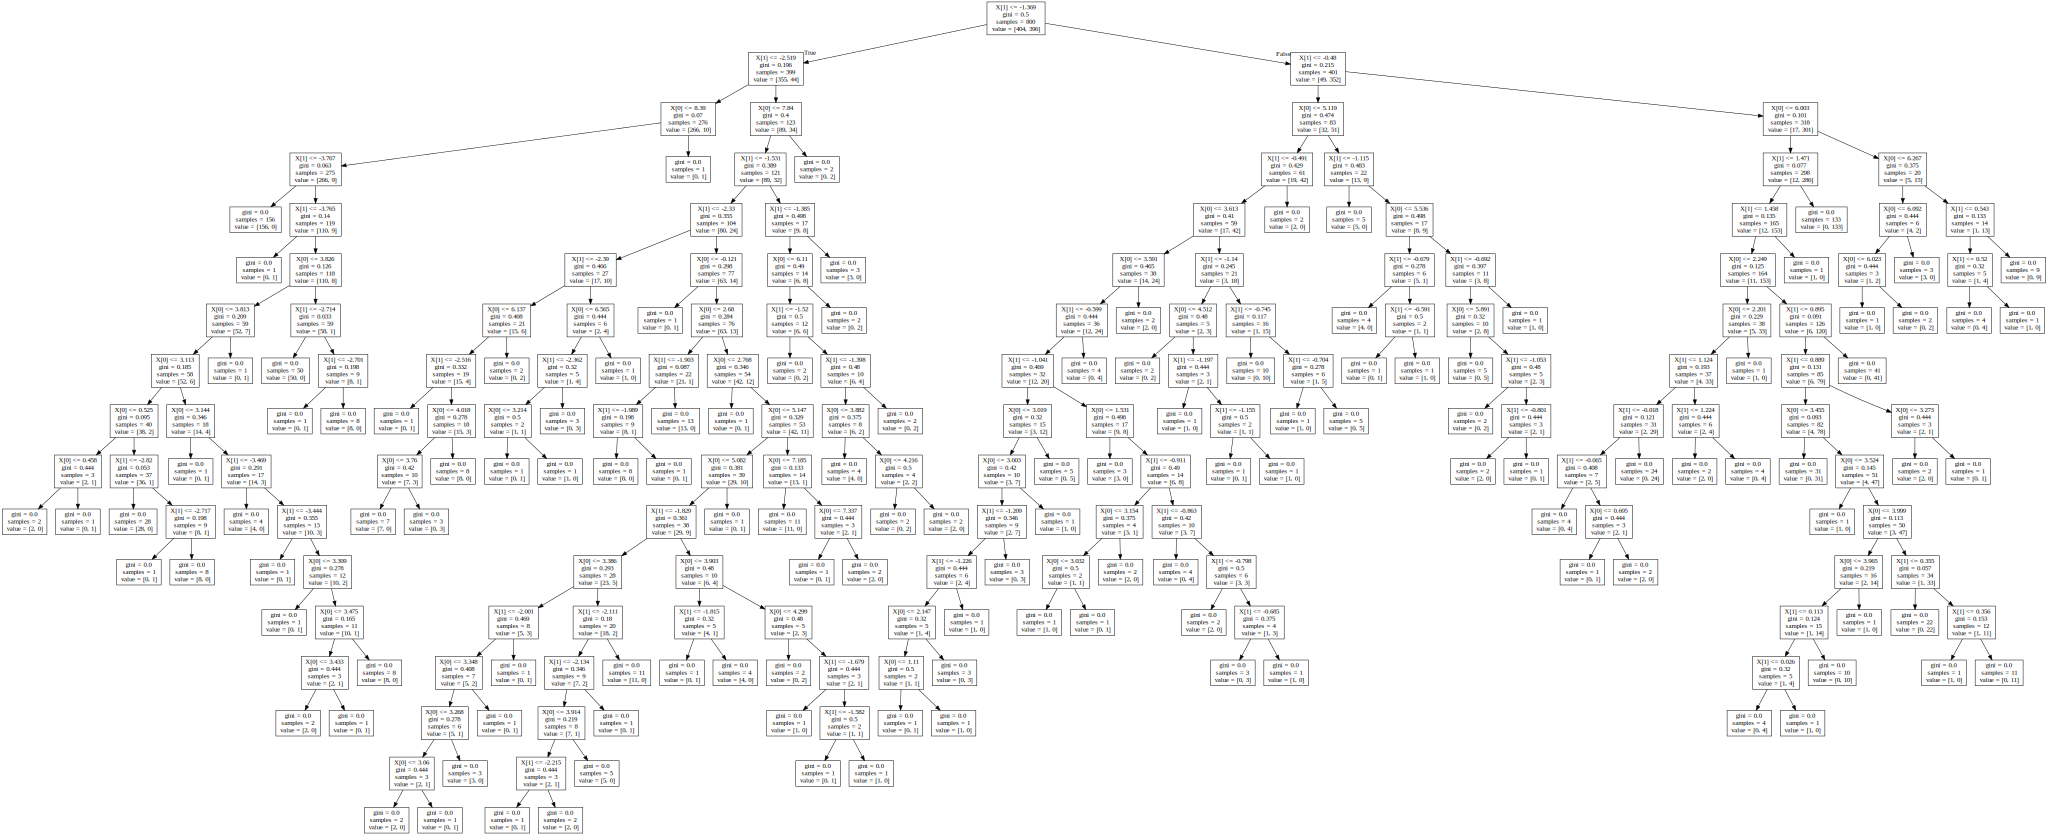

In [89]:
dot_data3 = tree.export_graphviz(clf3, out_file=None)
graph3 = graphviz.Source(dot_data3)  
graph3 


If you don't see anything right above, scroll in that window -- there is a HUGE tree in there.

Look at the top node of the tree. It says that it's splitting on the value of $X[1]$, based on whether $X[1]$ is greater than or equal to -1.369. It also says that there are 800 data points (samples) in the training set and that 404 have label 0 while 396 have label 1.

Every node also says something about the Gini index. We'll talk about that.

Look at the bottom leaves of the tree: there are many leaves that say "samples = 1". This means that the decision tree algorithm went along splitting until it was making very fine-grained distinctions between points.

Question for you: if your algorithm is making very finely-grained decisions like this, how robust is it to outliers? How do you think it's dealing with "mixed-up data"?


In [90]:
# Let's try "entropy" instead of Gini -- any change in results?

# create a model called clf using the DecisionTreeClassifier method
clf = tree.DecisionTreeClassifier(criterion='entropy')
# fit the model clf using the training data
clf2 = clf.fit(X2_train, y2_train)
# fit the model clf using the training data
clf3 = clf.fit(X3_train, y3_train)
y2_pred = clf2.predict(X2_test)
y3_pred = clf3.predict(X3_test)

In [91]:
metrics.accuracy_score(y2_test, y2_pred, normalize=True, sample_weight=None)
# This is so low that I honestly feel I'm making a mistake.

0.48125

In [92]:
metrics.accuracy_score(y3_test, y3_pred, normalize=True, sample_weight=None)
# This by contrast went up a bit!

0.9

Wow. Using entropy or information gain rather than Gini index makes rather a difference. (What do you see?)

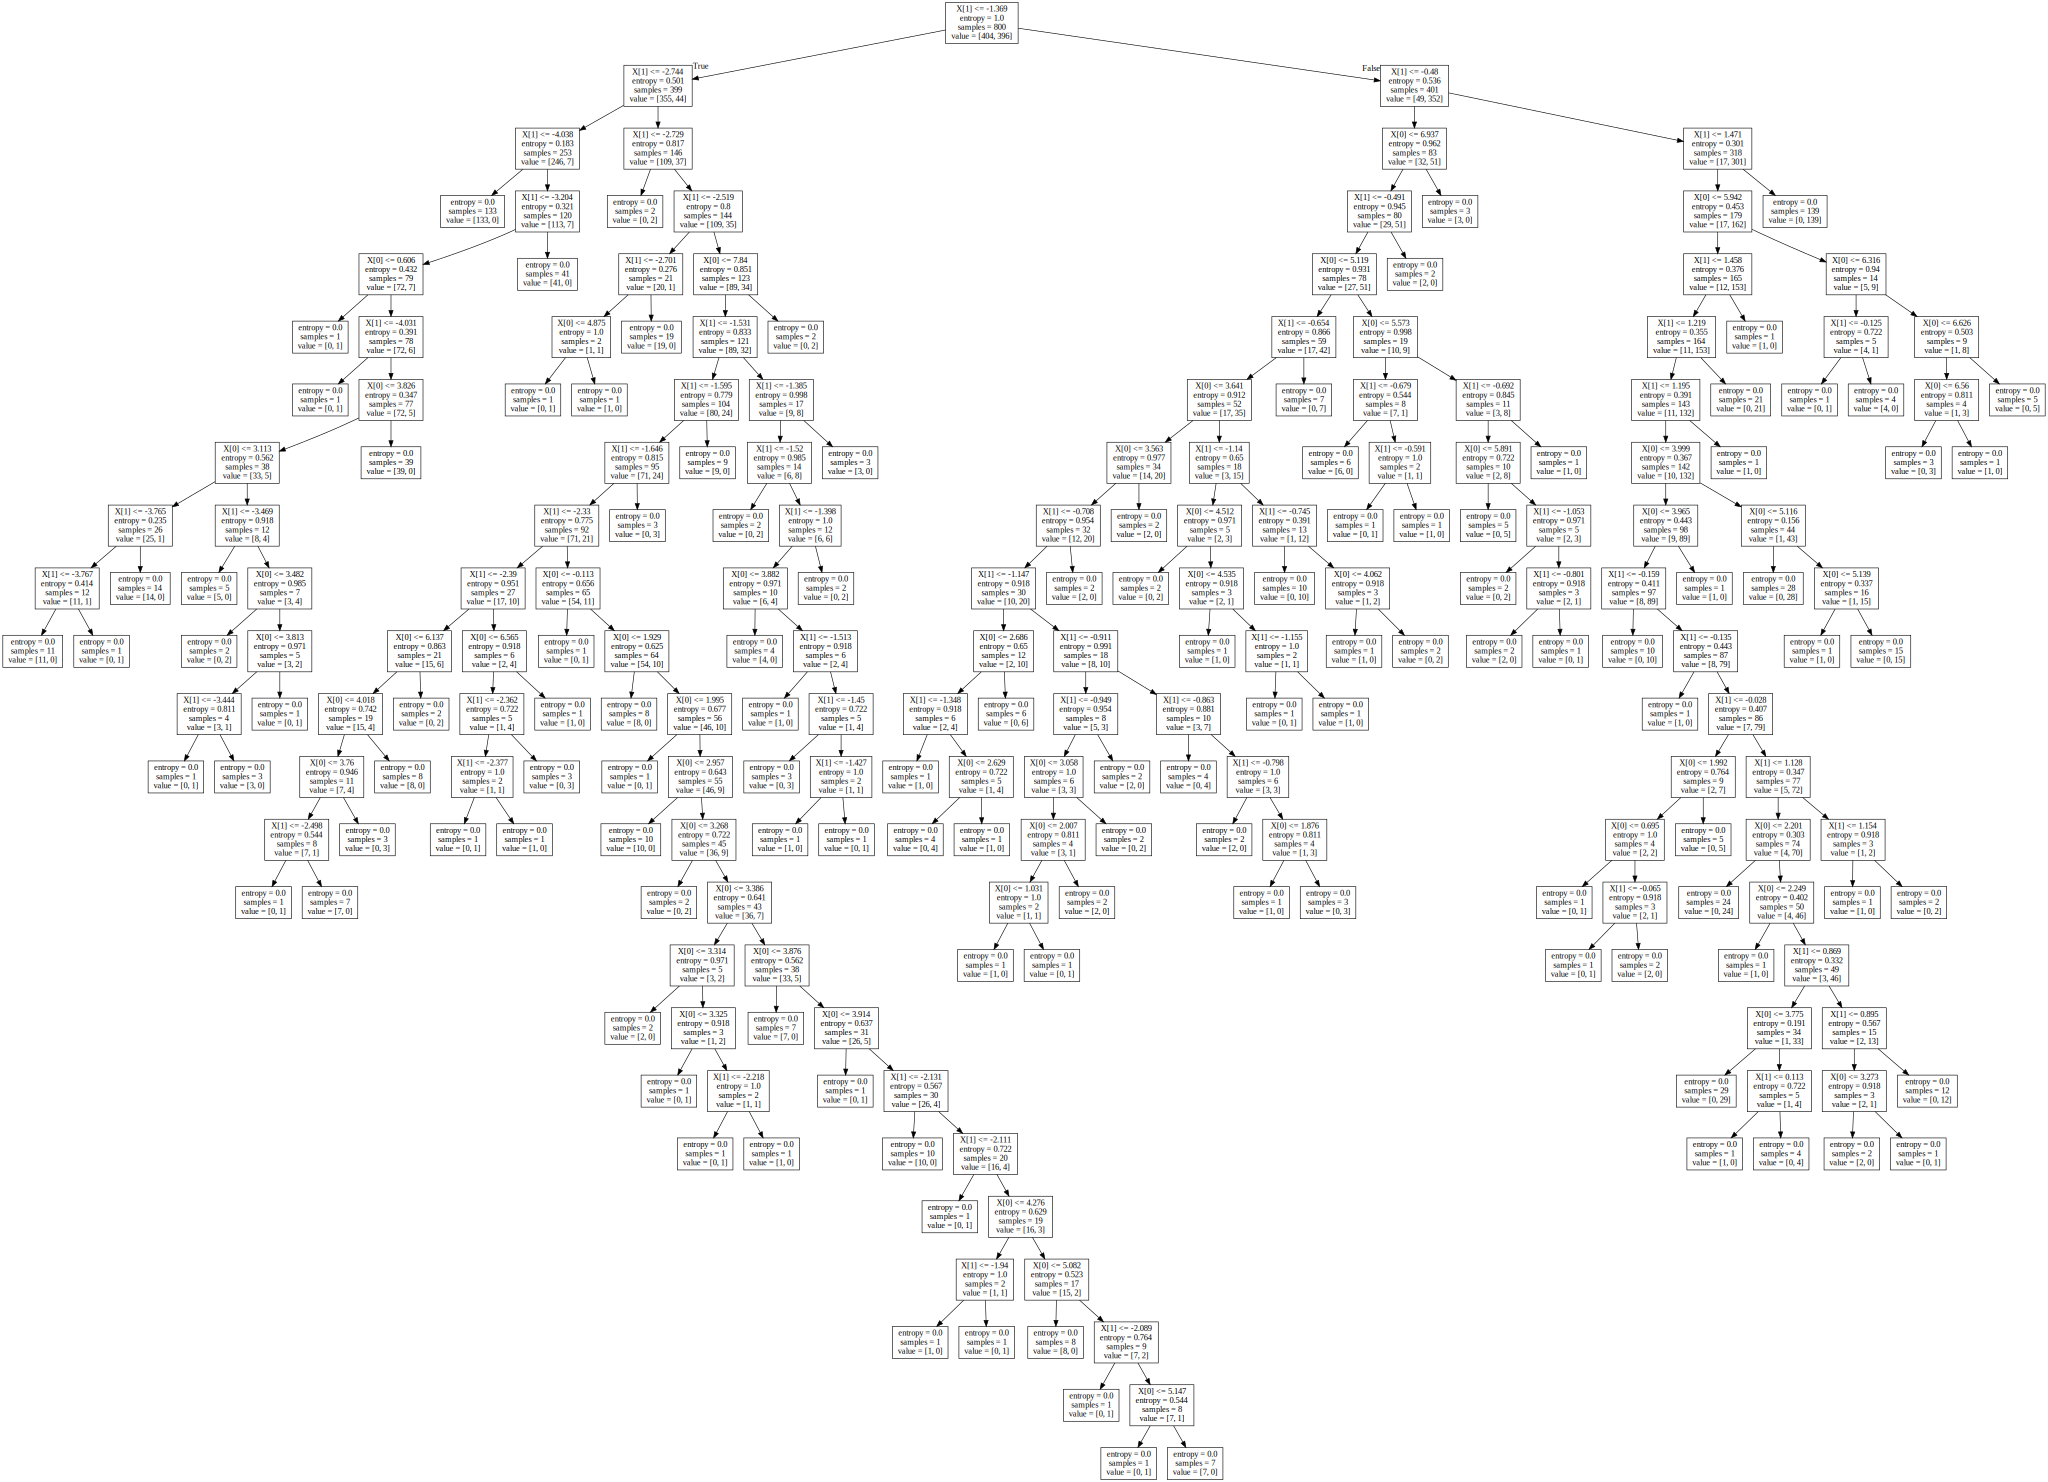

In [93]:
dot_data3 = tree.export_graphviz(clf3, out_file=None)
graph3 = graphviz.Source(dot_data3)  
graph3 


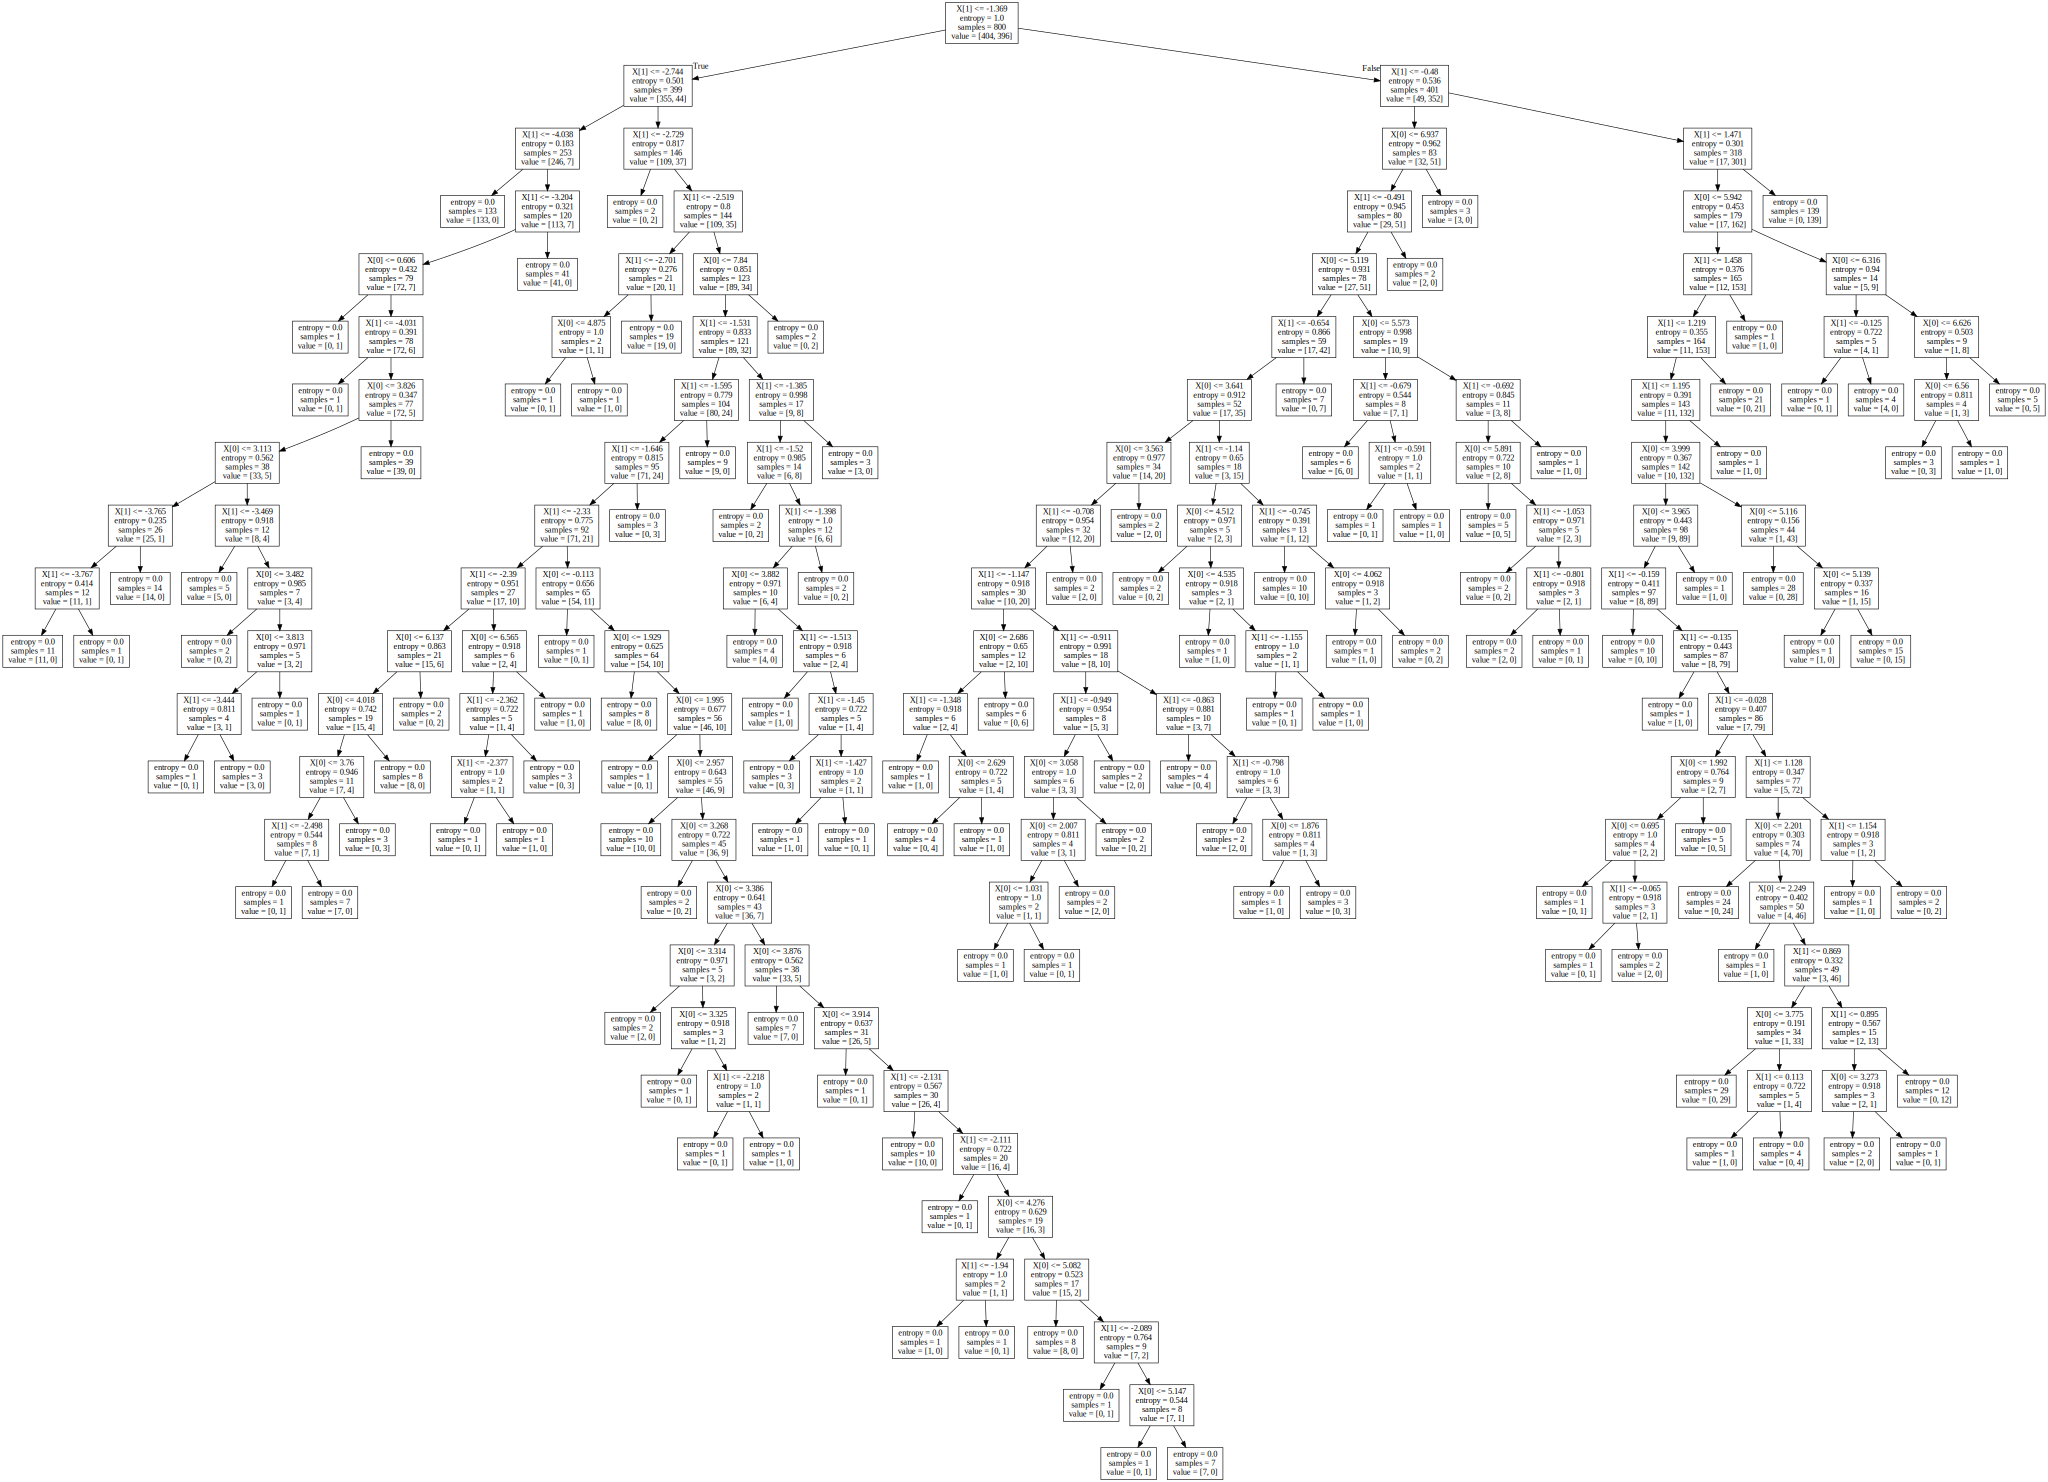

In [94]:
# This tree got *huge* -- and accuracy dropped a lot.

dot_data2 = tree.export_graphviz(clf2, out_file=None)
graph2 = graphviz.Source(dot_data2)  
graph2 

In [97]:
# Ok, I read on the internet that sometimes it's easy to overfit a model. Let's try max-depth = 3 for this tree.
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
# fit the model clf using the training data
clf2 = clf.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)

In [98]:
metrics.accuracy_score(y2_test, y2_pred, normalize=True, sample_weight=None)
# Look at that: setting max depth to 3 magically makes this a lot more accurate.

0.8875

This is a bizarre result if you don't have a lot of experience with decision trees and other algorithms. Making my model less complex, more easily explained, and more robust actually increased my accuracy on t